# Get soundings from the University of Wyoming archive!

* **TIM**:
    * 97372/WRKK - Kupang/Eltari
        * 10.16S, 123.66E
    * 97724/WAPP - Ambon/Pattimura
        * 3.7S, 128.08E
    * 94120/YPDN - Darwin Airport (about ~0.9E, ~0.4S out of box)
        * 12.42S, 130.89E
    * 97900/WAPI - Saumlaki/Ollilit (about ~1.3E out of box)
        * 7.98S, 131.3E
    * 97180/WAAA - Hasanuddin (about ~0.5W out of box)
        * 5.06S, 119.55E

* **SCA**: (NOTE - 2002 only! stations nearby inactive in 2020; 2002 is nearest to 2020 ENSO DJF conditions while still having a decent amount of dadta)
    * 67774/?? - Harare/Belvedere (about ~1deg SE out of box)
        * 17.83S, 31.01E
    * ~~67666/?? - Lusaka City~~ NO LAUNCHES in JFM! (but it was inside the box)
    
* **SPC**: 
    * 91650 (no 2020)
    * 91631 (no 2020)
    * 91643
        * 8.51S, 179.21E
    * 91680? (2.25 deg south of box)
    
* **AMZ**:
    * 87155 
        * 27.45S, 59.05W
    * 87178 (no 2020)
    * 87257 (no 2020)
    * 87129 (no 2020)
    * 87087 (no 2020)
    
~~(nothing in the TWP or south central Africa region unfortunately; can use Manus soundings & TOGA-COARE for TWP)~~

* ~~**SAV**:~~
    ~~* 83554/?? - Corumba~~
    ~~* 83612/SBCG - Campo Grande~~
    ~~* 83827/SBFI - Foz do Iguaco (about ~0.5S out of box)~~
    ~~* 86218/SGAS - Asuncion Airport (about ~0.25deg out of box)~~

In [24]:
import os
import glob
import pickle
import sys
sys.path.append("/home/disk/eos7/jnug/cold-point-overshoot/python_scripts")

import pandas as pd
import datetime as dt
import split_soundings as spl

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [5]:
save_dir = "/home/disk/eos7/jnug/cold-point-overshoot/plots/soundings/"


### Get the files

In [6]:
out_path = "/home/disk/eos15/jnug/uwyo_soundings/"


Download the station soundings as text files

In [16]:
tim_urls = [
    "",
]

tim_urls = [
    "",
]

amz_urls = [
    "https://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=02&FROM=0100&TO=2812&STNM=87155",
]

spc_urls = [
    "https://weather.uwyo.edu/cgi-bin/sounding?region=pac&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=02&FROM=0100&TO=2812&STNM=91643",
    
]


# for url in tim_urls:
#     file = out_path + "TIM/{}_all_soundings.txt".format(url[:-5])
#     ! touch {file}; curl {url} >> {file}

# for url in sca_urls:
#     file = out_path + "SCA/{}_all_soundings.txt".format(url[:-5])
#     ! touch {file}; curl {url} >> {file}

for url in spc_urls:
    ! mkdir -p out_path + "SPC/"
    file = out_path + "SPC/{}_all_soundings.txt".format(url[-5:])
    ! touch {file}; curl {url} >> {file}

for url in amz_urls:
    ! mkdir -p out_path + "AMZ/"
    file = out_path + "AMZ/{}_all_soundings.txt".format(url[-5:])
    ! touch {file}; curl {url} >> {file}
 

#### Just go to the urls, copy all the text, and manually past it into a text file... idk why curl isn't working

Make a list of the single text files for each station

In [17]:
all_files_TIM = []
all_files_SCA = []
all_files_AMZ = []
all_files_SPC = []

# for file in os.listdir(out_path + "TIM/"):
#     if file.startswith("all_sondes_"):
#         all_files_TIM.append(os.path.join(out_path + "TIM/", file))

# for file in os.listdir(out_path + "SCA/"):
#     if file.startswith("all_sondes_"):
#         all_files_SCA.append(os.path.join(out_path + "SCA/", file))
        
for file in os.listdir(out_path + "AMZ/"):
    if "all_soundings" in file:
        all_files_AMZ.append(os.path.join(out_path + "AMZ/", file))

for file in os.listdir(out_path + "SPC/"):
    if "all_soundings" in file:
        all_files_SPC.append(os.path.join(out_path + "SPC/", file))


Split the files for each station by date/time; files for each station will go into their own subdirectory (called the 5-digit station ID number, e.g. "97980/")

In [12]:
for all_file in all_files_TIM:
    spl.split_soundings(all_file, out_path + "TIM/")

for all_file in all_files_SCA:
    spl.split_soundings(all_file, out_path + "SCA/")
    

In [53]:
import importlib
importlib.reload(spl)

<module 'split_soundings' from '/home/disk/eos7/jnug/cold-point-overshoot/python_scripts/split_soundings.py'>

In [54]:
for all_file in all_files_SPC:
    spl.split_soundings(all_file, out_path + "SPC/", curled=False)

for all_file in all_files_AMZ:
    spl.split_soundings(all_file, out_path + "AMZ/", curled=False)
    

### Read into data frames

In [7]:
out_path = "/home/disk/eos15/jnug/uwyo_soundings/"


In [8]:
def get_date_from_name(file):
    """ helper function to get datetime object from file name
    """
    yr, mo, day, hr = file[-19:-5].split("_")

    # ugh hardcoding 
    if mo == "Feb":
        mo = "2"
    elif mo == "Jan":
        mo = "1"
    elif mo == "Mar":
        mo = "3"

    date_value = dt.datetime(int(yr), int(mo), int(day), int(hr))

    return date_value


In [14]:
data_list_tim = []
data_list_sca = []

# TIM
# for file in os.listdir(out_path + "TIM/"):
for file in glob.iglob(out_path + "TIM/**", recursive=True):
    if file.endswith("Z.txt"):
        stn_id = file[47:52]

        data = pd.read_csv(os.path.join(out_path, file), delim_whitespace=True, skiprows=[0, 2, 3])
        
        data["TIME"] = get_date_from_name(file)
        data["STN"] = stn_id
        data["TEMP"] += 273.15
        data["DWPT"] += 273.15
        
        data_list_tim.append(data.copy())

# SCA
for file in glob.iglob(out_path + "SCA/**", recursive=True):
    if file.endswith("Z.txt"):
        # indices are hardcoded for the file path...
        stn_id = file[47:52]

        data = pd.read_csv(os.path.join(out_path, file), delim_whitespace=True, skiprows=[0, 2, 3])
        data["TIME"] = get_date_from_name(file)
        data["STN"] = stn_id
        data["TEMP"] += 273.15
        data["DWPT"] += 273.15
        
        data_list_sca.append(data.copy())
        

In [15]:
data_list_amz = []
data_list_spc = []

for file in glob.iglob(out_path + "AMZ/**", recursive=True):
    if file.endswith("Z.txt"):
        # indices are hardcoded for the file path...
        stn_id = file[47:52]

        data = pd.read_csv(os.path.join(out_path, file), delim_whitespace=True, skiprows=[0, 2, 3])
        data["TIME"] = get_date_from_name(file)
        data["STN"] = stn_id
        variable_list = list(data.columns[:-2])
        type_list = [float]*len(variable_list)
        try:
            data = data.astype(dict(zip(variable_list, type_list)))
        except:
            try:
                data.drop(data.tail(1).index, inplace=True)
                data = data.astype(dict(zip(variable_list, type_list)))
            except:
                data.drop(data.tail(2).index, inplace=True)
                data = data.astype(dict(zip(variable_list, type_list)))
        data["TEMP"] += 273.15
        data["DWPT"] += 273.15
        
        data_list_amz.append(data.copy())
        
for file in glob.iglob(out_path + "SPC/**", recursive=True):
    if file.endswith("Z.txt"):
        # indices are hardcoded for the file path...
        stn_id = file[47:52]

        data = pd.read_csv(os.path.join(out_path, file), delim_whitespace=True, skiprows=[0, 2, 3])
        data["TIME"] = get_date_from_name(file)
        data["STN"] = stn_id
        variable_list = list(data.columns[:-2])
        type_list = [float]*len(variable_list)
        try:
            data = data.astype(dict(zip(variable_list, type_list)))
        except:
            try:
                data.drop(data.tail(1).index, inplace=True)
                data = data.astype(dict(zip(variable_list, type_list)))
            except:
                data.drop(data.tail(2).index, inplace=True)
                data = data.astype(dict(zip(variable_list, type_list)))
        data["TEMP"] += 273.15
        data["DWPT"] += 273.15
        
        data_list_spc.append(data.copy())


#### Combine into one per region (all levels for all soundings)

In [16]:
data_tim = pd.concat(data_list_tim)
data_sca = pd.concat(data_list_sca)


In [17]:
data_spc = pd.concat(data_list_spc)
data_amz = pd.concat(data_list_amz)


### Get the cold points

In [18]:
cp_list_tim = []

for i, df in enumerate(data_list_tim):
    cp_row = df[df.TEMP == df.TEMP.min()]
    
    # if there's more than one cold point level, take the first
    if len(cp_row) > 1:
        cp_row = cp_row.head(1)
    
    # quality checks (limit to 14.5-22 km)
    if cp_row.HGHT.values >= 14500 and cp_row.HGHT.values <= 22000:
        cp_list_tim.append(cp_row.copy())

cp_tim = pd.concat(cp_list_tim)


In [19]:
cp_list_sca = []

for i, df in enumerate(data_list_sca):
    cp_row = df[df.TEMP == df.TEMP.min()]
    
    # if there's more than one cold point level, take the first
    if len(cp_row) > 1:
        cp_row = cp_row.head(1)
    
    # quality checks (limit to 14.5-22 km)
    if cp_row.HGHT.values >= 14500 and cp_row.HGHT.values <= 22000:
        cp_list_sca.append(cp_row.copy())

cp_sca = pd.concat(cp_list_sca)


In [20]:
cp_list_spc = []

for i, df in enumerate(data_list_spc):
    cp_row = df[df.TEMP == df.TEMP.min()]
    
    # if there's more than one cold point level, take the first
    if len(cp_row) > 1:
        cp_row = cp_row.head(1)
    
    # quality checks (limit to 14.5-22 km)
    if cp_row.HGHT.values >= 14500 and cp_row.HGHT.values <= 22000:
        cp_list_spc.append(cp_row.copy())

cp_spc = pd.concat(cp_list_spc)


In [21]:
cp_list_amz = []

for i, df in enumerate(data_list_amz):
    cp_row = df[df.TEMP == df.TEMP.min()]
    
    # if there's more than one cold point level, take the first
    if len(cp_row) > 1:
        cp_row = cp_row.head(1)
    
    # quality checks (limit to 14.5-22 km)
    if cp_row.HGHT.values >= 14500 and cp_row.HGHT.values <= 22000:
        cp_list_amz.append(cp_row.copy())

cp_amz = pd.concat(cp_list_amz)


#### Combine into one per region (cold point levels of each sounding only) and save into a pickle file

In [25]:
cp_dict = {
    "SCA": [cp_sca.TEMP.mean(), cp_sca.HGHT.mean()/1000.],
    "TIM": [cp_tim.TEMP.mean(), cp_tim.HGHT.mean()/1000.],
    "SPC": [cp_spc.TEMP.mean(), cp_spc.HGHT.mean()/1000.],
    "AMZ": [cp_amz.TEMP.mean(), cp_amz.HGHT.mean()/1000.]
}

In [26]:
cp_dict

{'SCA': [192.5388888888889, 17.74083333333333],
 'TIM': [188.6536101083032, 17.17763176895307],
 'SPC': [186.59399999999994, 17.41648],
 'AMZ': [196.13181818181818, 17.461045454545456]}

In [27]:
with open("/home/disk/eos7/jnug/cold-point-overshoot/pickle_files/sounding_mean_cold_points.pickle", "wb") as handle:
    pickle.dump(cp_dict, handle)
    

Hardcode this part... would be better to get it from the data but whatever

In [25]:
# make them strings
station_ids = [
    "83554", 
    "83827", 
    "83612", 
    "86218",
    "97372", 
    "94120", 
    "97724", 
    "97180", 
    "97900"
]

# (lat, lon)
station_coords = [
    (-19.00, -57.67),
    (-25.52, -54.58),
    (-20.46, -54.66),
    (-25.26, -57.63),
    (-10.16, 123.66),
    (-12.42, 130.89),
    (-3.70, 128.08),
    (-5.06, 119.55),
    (-7.98, 131.30)
]

stn_coords_dict = dict(zip(station_ids, station_coords))


In [26]:
sav_stn_ids = station_ids[:-5]
tim_stn_ids = station_ids[4:]


In [27]:
# hardcode for SCA

sca_stn_ids = ["67774"]
stn_coords_dict["67774"] = (-17.83, 31.01)


#### This is what the stations look like

In [29]:
stamen_terrain = cimgt.Stamen('terrain-background')
textsize = 12
numsize = 12
lw = 2
msize = 12


In [30]:
stn_colors = ["C0", "C1", "C2", "C3", "C4"]

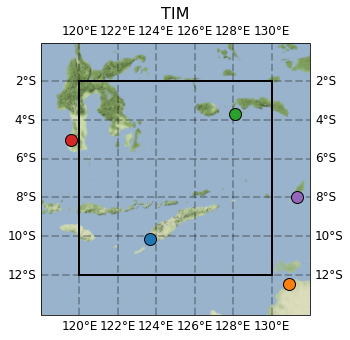

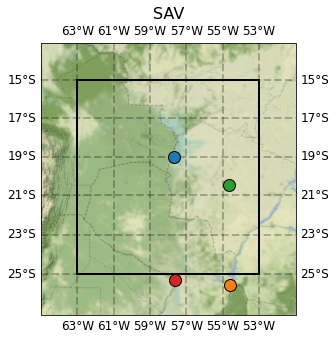

In [134]:
#  ------- TIM -------
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=stamen_terrain.crs)

ax.add_image(stamen_terrain, 6)
ax.set_extent([118, 132, -14, 0], crs=ccrs.Geodetic())


# gridlines and axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.25, linestyle='--',
                  xlocs=np.arange(118, 132, step=2), ylocs=np.arange(-14, 0, step=2))
gl.xlabel_style = {'size': numsize}
gl.ylabel_style = {'size': numsize}


# box for the region
ax.add_patch(mpatches.Rectangle(xy=[120, -12], width=10, height=10,
                                fill=False, color='k', linewidth=lw,
                                transform=ccrs.Geodetic()))

# Add station dots
for i, stn_id in enumerate(tim_stn_ids):
    lat, lon = stn_coords_dict[stn_id]
    ax.plot(lon, lat, marker='o', markersize=msize, markeredgewidth=1,
             markerfacecolor=stn_colors[i], markeredgecolor='k',
             transform=ccrs.Geodetic())
    
plt.title("TIM", fontsize=textsize+4)
plt.savefig(save_dir + "TIM_radiosonde_site_locations.png", dpi=300, bbox_inches="tight")

plt.show()



#  ------- SAV -------

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=stamen_terrain.crs)

ax.add_image(stamen_terrain, 6)
ax.set_extent([-65, -51, -27, -13], crs=ccrs.Geodetic())


# gridlines and axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.25, linestyle='--',
                  xlocs=np.arange(-65, -51, step=2), ylocs=np.arange(-27, -13, step=2))
gl.xlabel_style = {'size': numsize}
gl.ylabel_style = {'size': numsize}


# box for the region
ax.add_patch(mpatches.Rectangle(xy=[-63, -25], width=10, height=10,
                                fill=False, color='k', linewidth=lw,
                                transform=ccrs.Geodetic()))

# Add station dots
for i, stn_id in enumerate(sav_stn_ids):
    lat, lon = stn_coords_dict[stn_id]
    ax.plot(lon, lat, marker='o', markersize=msize, markeredgewidth=1,
             markerfacecolor=stn_colors[i], markeredgecolor='k',
             transform=ccrs.Geodetic())
    
plt.title("SAV", fontsize=textsize+4)
plt.savefig(save_dir + "SAV_radiosonde_site_locations.png", dpi=300, bbox_inches="tight")
    
plt.show()


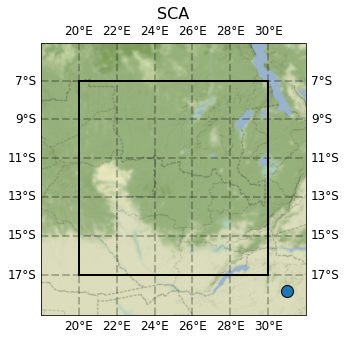

In [33]:
#  ------- SCA -------
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=stamen_terrain.crs)

ax.add_image(stamen_terrain, 6)
ax.set_extent([18, 32, -19, -5], crs=ccrs.Geodetic())


# gridlines and axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.25, linestyle='--',
                  xlocs=np.arange(18, 32, step=2), ylocs=np.arange(-19, 0, step=2))
gl.xlabel_style = {'size': numsize}
gl.ylabel_style = {'size': numsize}


# box for the region
ax.add_patch(mpatches.Rectangle(xy=[20, -17], width=10, height=10,
                                fill=False, color='k', linewidth=lw,
                                transform=ccrs.Geodetic()))

# Add station dots
for i, stn_id in enumerate(sca_stn_ids):
    lat, lon = stn_coords_dict[stn_id]
    ax.plot(lon, lat, marker='o', markersize=msize, markeredgewidth=1,
             markerfacecolor=stn_colors[i], markeredgecolor='k',
             transform=ccrs.Geodetic())
    
plt.title("SCA", fontsize=textsize+4)
plt.savefig(save_dir + "SCA_radiosonde_site_locations.png", dpi=300, bbox_inches="tight")

plt.show()

